**Univariate time series visualization with python**
An easy way to transform and visualize a univariate time data series. 

A time series is a sequence of a single or a group of data points occurred and recorder over regular time intervals. A time series can be univariate or multivariate, depending of the number of variables recorded in each time interval.

In this case we are going to graph a time series of variables that represent the different temperatures recorded by a sensor with an hourly period.

**Loading dataset**
Dataset used with temperature information is based on Max Planck Weather Dataset (https://www.kaggle.com/datasets/arashnic/max-planck-weather-dataset) and is stored in a public github repository. Once the dataset is loaded, we can obtain the information from the dataset, as well as a preview a sample of the data and some basic statistics.

In [2]:
import pandas as pd

#based on dataset https://www.kaggle.com/datasets/arashnic/max-planck-weather-dataset
#Import dataset dates from github
url = 'https://raw.githubusercontent.com/mabrotons/datasets/master/weather_1D.csv'

df = pd.read_csv(url, index_col=False, parse_dates=['Date Time'])

df['DateTime'] = pd.to_datetime(df['Date Time'], utc=True)
df.sort_values(by='DateTime', inplace = True)
df.set_index('Date Time', inplace = True)

print("Data frame info: ") 
print(df.info())

print("\nData frame head: ") 
print(df.head())

print("\nDescribe: ") 
print(df.describe())

Data frame info: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420550 entries, 2009-01-01 00:10:00 to 2016-12-31 23:50:00
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   T (degC)  420550 non-null  float64            
 1   DateTime  420550 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 9.6 MB
None

Data frame head: 
                     T (degC)                  DateTime
Date Time                                              
2009-01-01 00:10:00     -8.02 2009-01-01 00:10:00+00:00
2009-01-01 00:20:00     -8.41 2009-01-01 00:20:00+00:00
2009-01-01 00:30:00     -8.51 2009-01-01 00:30:00+00:00
2009-01-01 00:40:00     -8.31 2009-01-01 00:40:00+00:00
2009-01-01 00:50:00     -8.27 2009-01-01 00:50:00+00:00

Describe: 
            T (degC)
count  420550.000000
mean        9.450181
std         8.423346
min       -23.010000
25%         3.360000
50%         

Let's plot the time series with a time line for temperature and including the mean, and maximum and minimum bounds.

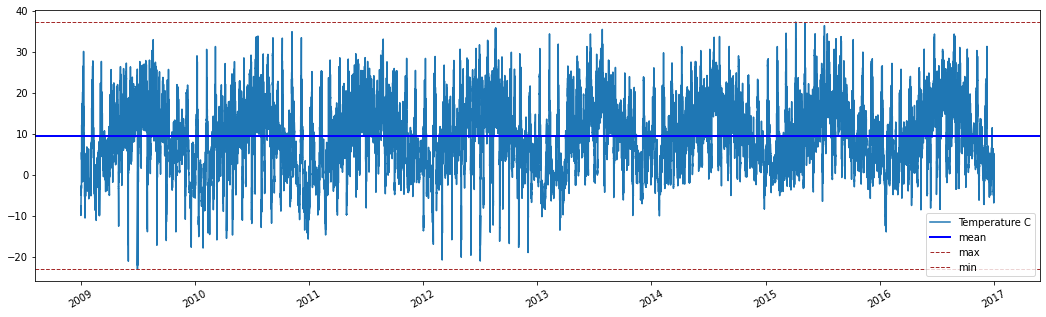

In [3]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)

#basic stats 
mean_temp = df['T (degC)'].mean()
max_temp = df['T (degC)'].max()
min_temp = df['T (degC)'].min()
stdev_temp = df['T (degC)'].std()

plt.plot(df.index, df['T (degC)'], label='Temperature C')
#add horizontal line for mean, max and min values of temp
plt.axhline(y=mean_temp, color='blue', linewidth=2, label='mean')
plt.axhline(y=max_temp, color='brown', linewidth=1, label='max', linestyle='dashed')
plt.axhline(y=min_temp, color='brown', linewidth=1, label='min', linestyle='dashed')

plt.xticks(rotation=30)
plt.legend()
plt.show()

Additionally to the time line plot, we will build a graph to represent all the data included in the dataset in order to have a first view of data distribution.

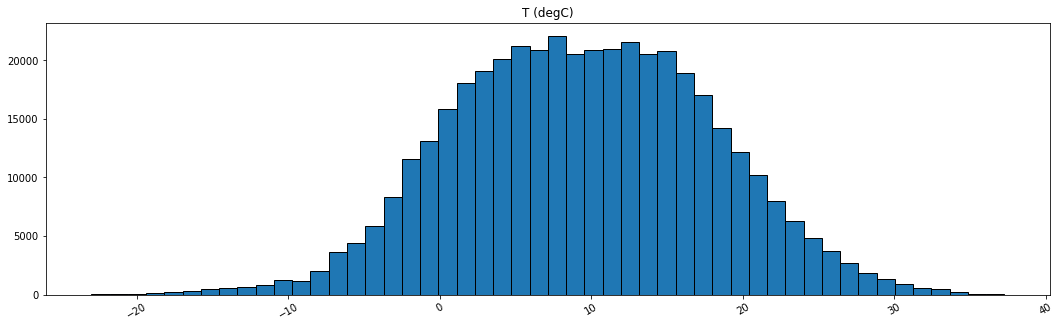

In [4]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)
plt.hist(df['T (degC)'], bins=50, edgecolor='black')

plt.xticks(rotation=30)
plt.title("T (degC)")
plt.show()

Now, having a normal distribution, with z-score calculation we can measure how many standard deviations a value is far away from the mean, and the probability of data to be unusual in a distribution.
For that, we will plot:
- a blue line with mean
- two green lines for [mean - (1*std)] and [mean + (1*std)] 
- two orange lines for [mean - (2*std)] and [mean + (2*std)] 
- two red lines for [mean - (3*std)] and [mean + (3*std)] 

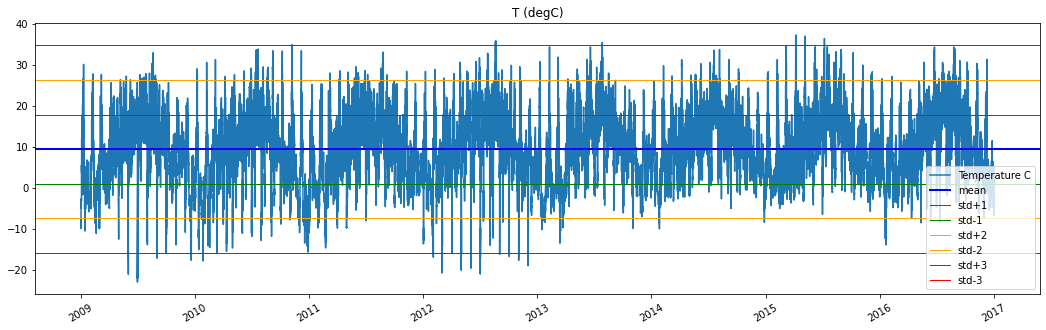

In [5]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)

plt.plot(df.index, df['T (degC)'], label='Temperature C')

#add horizontal line at std value of dataset and how many std data is located
stdev_temp = df['T (degC)'].std()

#add horizontal lines for how many stds from mean
plt.axhline(y=mean_temp, color='blue', linewidth=2, label='mean')
plt.axhline(y=mean_temp+stdev_temp, color='green', linewidth=1, label='std+1')
plt.axhline(y=mean_temp-stdev_temp, color='green', linewidth=1, label='std-1')
plt.axhline(y=mean_temp+(2*stdev_temp), color='orange', linewidth=1, label='std+2')
plt.axhline(y=mean_temp-(2*stdev_temp), color='orange', linewidth=1, label='std-2')
plt.axhline(y=mean_temp+(3*stdev_temp), color='red', linewidth=1, label='std+3')
plt.axhline(y=mean_temp-(3*stdev_temp), color='red', linewidth=1, label='std-3')

plt.xticks(rotation=30)
plt.title("T (degC)")
plt.legend()
plt.show()

**Moving average**

Moving average is a indicator commonly used in technical analysis. The reason for calculating one o various moving averages is to help smooth time lines, mitigating  the impacts of random and short-term fluctuations.
Let's compute three different moving averages (daily, weekly and monthly) for a better visualization of time series trends. The greater the range of the moving average, the greater the attenuation of the time series.

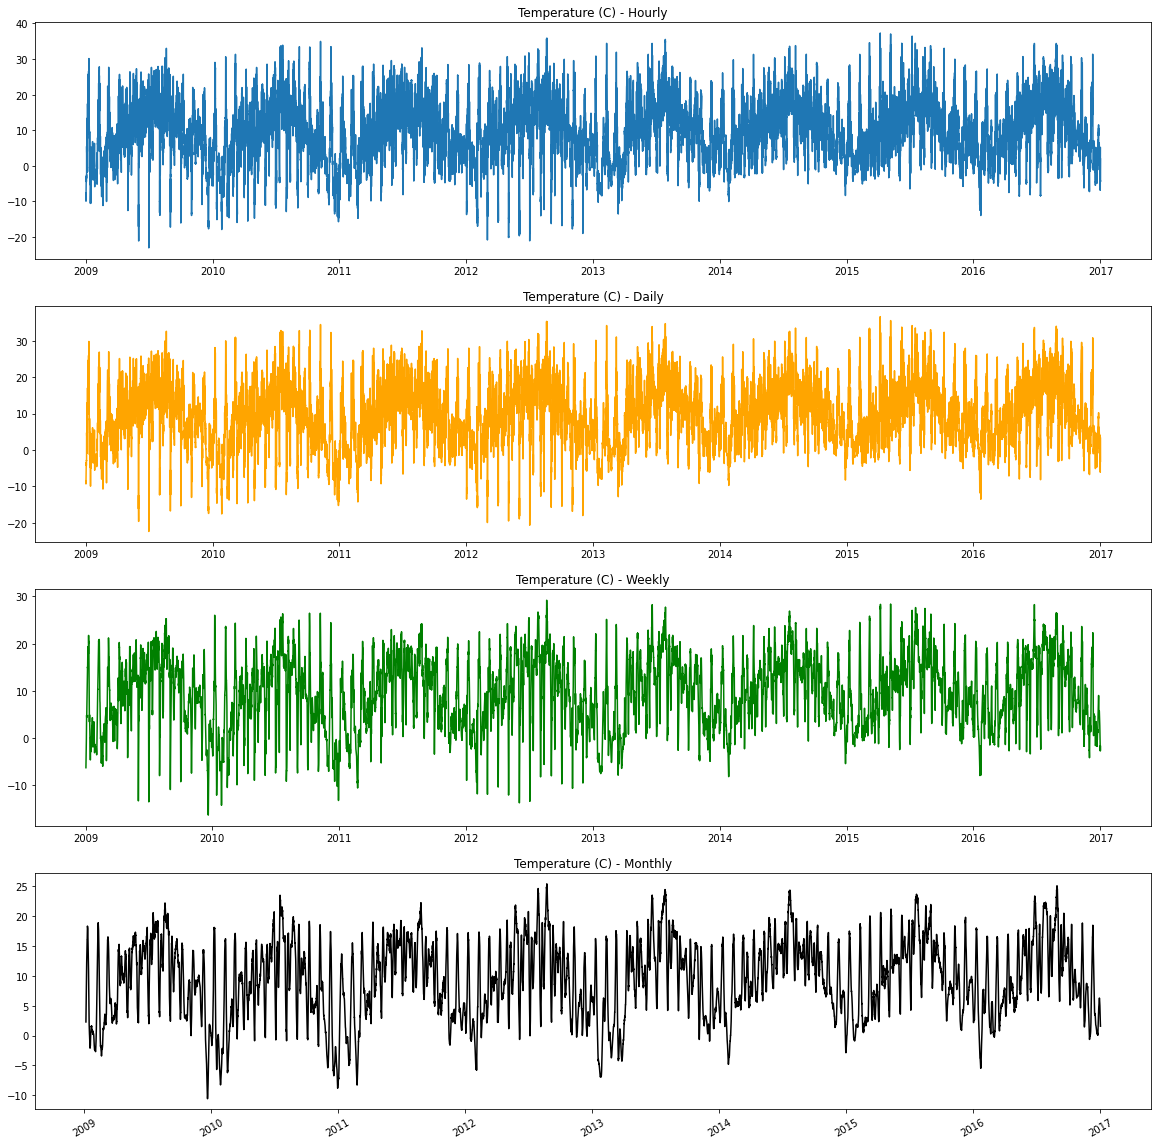

In [6]:
df['temp_mean_24H'] = df['T (degC)'].rolling(24).mean() #daily
df['temp_mean_week'] = df['T (degC)'].rolling(24*7).mean() #weekly
df['temp_mean_month'] = df['T (degC)'].rolling(24*7*4).mean() #monthly

fig, axes =plt.subplots(4, 1, figsize=(20,20))

axes[0].plot(df.index, df['T (degC)'])
axes[1].plot(df.index, df['temp_mean_24H'], color='orange')
axes[2].plot(df.index, df['temp_mean_week'], color='green')
axes[3].plot(df.index, df['temp_mean_month'], color='black')

axes[0].title.set_text('Temperature (C) - Hourly')
axes[1].title.set_text('Temperature (C) - Daily')
axes[2].title.set_text('Temperature (C) - Weekly')
axes[3].title.set_text('Temperature (C) - Monthly')

plt.xticks(rotation=30)
plt.show()

**Aggregating data**
Pandas dataframe.groupby() is a function that helps us to aggregate data by applying simple functions to the selected value to group by.  
Let's aggregate data by four different periods: Day, Week, Month and Year, drawing the mean line and painting the maximum and minimum boundary area.

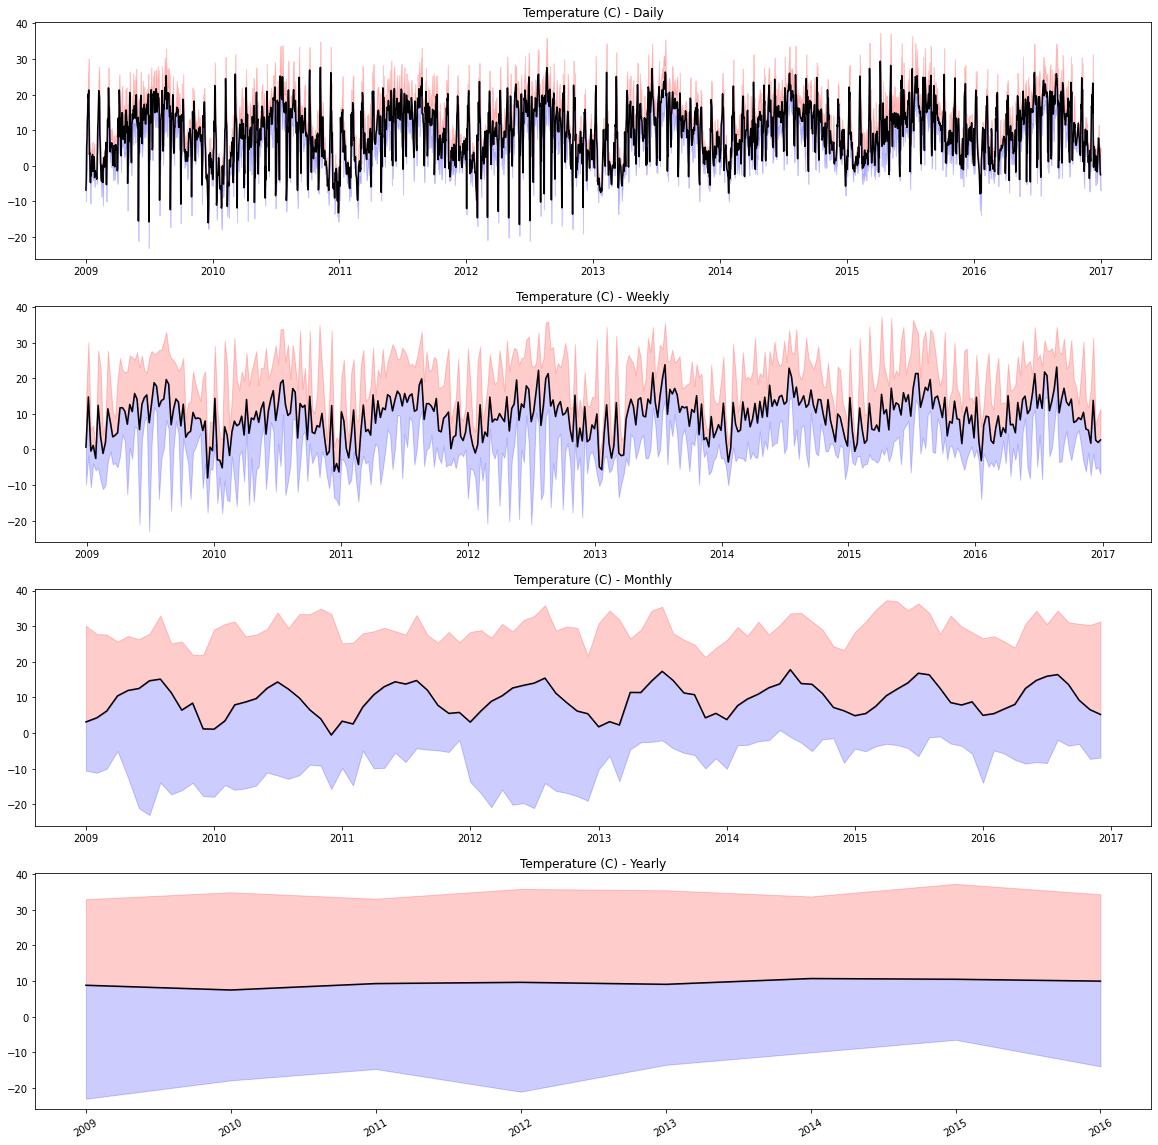

In [9]:
import numpy as np 

day_agg = df.groupby(df.index.to_period("D"))['T (degC)'].agg(['min', 'mean', 'max']) #Daily
week_agg = df.groupby(df.index.to_period("W"))['T (degC)'].agg(['min', 'mean', 'max']) #Weekly
month_agg = df.groupby(df.index.to_period("M"))['T (degC)'].agg(['min', 'mean', 'max']) #Monthly
year_agg = df.groupby(df.index.to_period("Y"))['T (degC)'].agg(['min', 'mean', 'max']) #Yearly

fig, axes =plt.subplots(4, 1, figsize=(20,20))

axes[0].plot(day_agg.index.astype('datetime64'), day_agg['mean'], color='black')
axes[0].fill_between(day_agg.index.astype('datetime64'), day_agg['max'], day_agg['mean'], alpha=0.2, color='red')
axes[0].fill_between(day_agg.index.astype('datetime64'), day_agg['min'], day_agg['mean'], alpha=0.2, color='blue')

axes[1].plot(week_agg.index.astype('datetime64'), week_agg['mean'], color='black') 
axes[1].fill_between(week_agg.index.astype('datetime64'), week_agg['max'], week_agg['mean'], alpha=0.2, color='red')
axes[1].fill_between(week_agg.index.astype('datetime64'), week_agg['min'], week_agg['mean'], alpha=0.2, color='blue')

axes[2].plot(month_agg.index.astype('datetime64'), month_agg['mean'], color='black') 
axes[2].fill_between(month_agg.index.astype('datetime64'), month_agg['max'], month_agg['mean'], alpha=0.2, color='red')
axes[2].fill_between(month_agg.index.astype('datetime64'), month_agg['min'], month_agg['mean'], alpha=0.2, color='blue')
  
axes[3].plot(year_agg.index.astype('datetime64'), year_agg['mean'], color='black') 
axes[3].fill_between(year_agg.index.astype('datetime64'), year_agg['max'], year_agg['mean'], alpha=0.2, color='red')
axes[3].fill_between(year_agg.index.astype('datetime64'), year_agg['min'], year_agg['mean'], alpha=0.2, color='blue')


axes[0].title.set_text('Temperature (C) - Daily')
axes[1].title.set_text('Temperature (C) - Weekly')
axes[2].title.set_text('Temperature (C) - Monthly')
axes[3].title.set_text('Temperature (C) - Yearly')

plt.xticks(rotation=30)
plt.show()

**Time Series analysis (tsa)**

With tsa library we can decompose a time series in its trend, seasonal and residual components. Using moving average we can see:
- trend component, which refers to patterns in the data that spans across seasonal periods
- seasonal component, which explains the periodic ups and downs in many data sets
- residual component, which allows us to see what remains after removing trends and seasonality

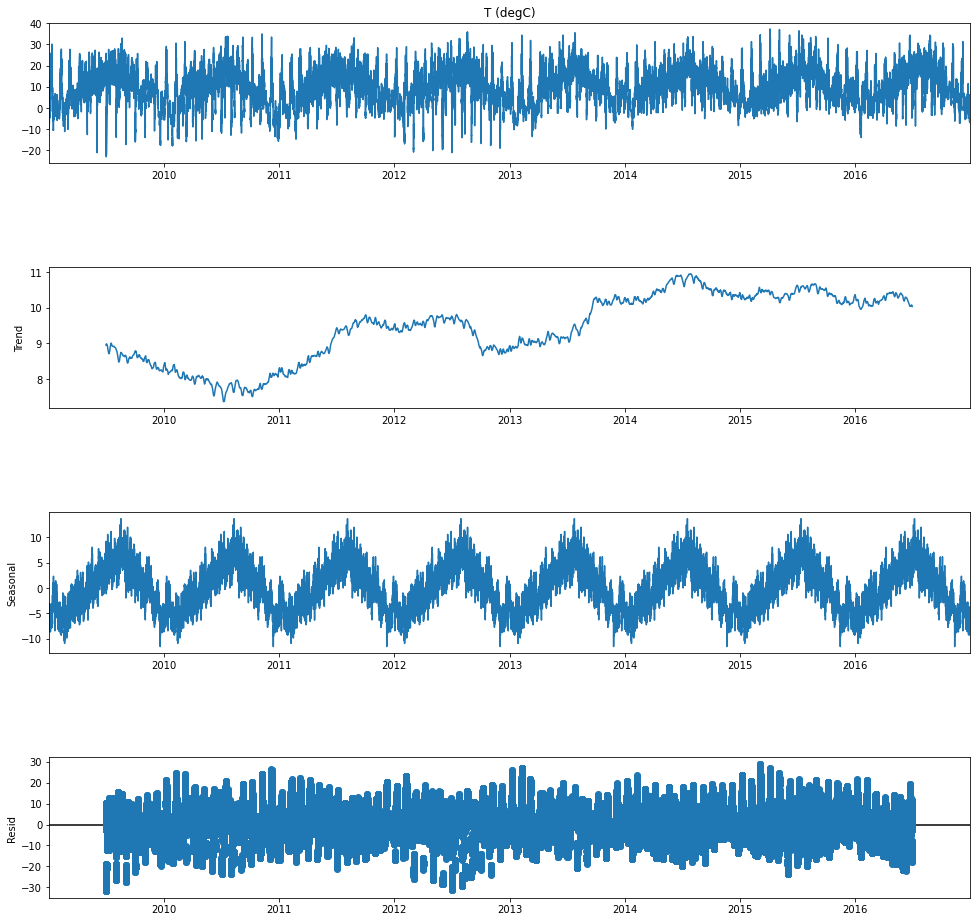

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

res_decompose  = seasonal_decompose(df['T (degC)'], model="additive", period=360*24*6)

f = res_decompose.plot()
f.set_figwidth(15)
f.set_figheight(15)

**Conclusion**

With some basic statistical functions and graphics we can start a basic analysis of an univariate time series data set and determine its distribution, trends, patterns and detect outlier candidates.